<a href="https://colab.research.google.com/github/abmaeld/PROB/blob/master/Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# boas práticas: criar uma célula com todas as bibliotecas necessárias
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# Turmas 2016.1
# http://dados.ufrn.br/dataset/turmas

# turmas dos 3 semestres
turmas_url_2016_02 = 'http://bit.do/turmas_ufrn_2016_2'
turmas_url_2017_02 = 'http://bit.do/turmas_ufrn_2017_2'
turmas_url_2017_01 = 'http://bit.do/turmas_ufrn_2017_1'

# matrículas em componentes dos 3 semestres
notas_url_2016_02 = 'http://bit.do/notas_ufrn_2016_2'
notas_url_2017_02 = 'http://bit.do/notas_ufrn_2017_2'
notas_url_2017_01 = 'http://bit.do/notas_ufrn_2017_1'

# componentes curriculares presenciais
disciplinas_url = 'http://bit.do/componentes_curriculares_ufrn'

# docentes da ufrn atualizado em 2016 e em 2017
docentes_url_2016 = 'http://bit.do/docentes_ufrn_2017'
docentes_url_2017 = 'http://bit.do/docentes_ufrn_2017'

# turmas 2016.2 e 2017.2 e 2017.1
turmas_2016_02 = pd.read_csv(turmas_url_2016_02, sep=';')
turmas_2017_02 = pd.read_csv(turmas_url_2017_02, sep=';')
turmas_2017_01 = pd.read_csv(turmas_url_2017_01, sep=';')

# matriculas em componentes em todas as disciplinas
notas_2016_02 = pd.read_csv(notas_url_2016_02, sep=';')
notas_2017_02 = pd.read_csv(notas_url_2017_02, sep=';')
notas_2017_01 = pd.read_csv(notas_url_2017_01, sep=';')

# componentes curriculares presenciais
# por alguma razão ou outra, esse dataset tinha algum lixo em linhas que ocasionava 
# erros de leitura, dessa forma foi realizado um filtro apenas por colunas mais importantes
disciplinas = pd.read_csv(disciplinas_url, 
                          sep=';', 
                          usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

docentes_2016 = pd.read_csv(docentes_url_2016, sep=';')
docentes_2017 = pd.read_csv(docentes_url_2017, sep=';')

In [0]:
# Adaptando o dataframe turma e disciplinas para o merge
# Esse procedimento é necessário pois o dataframe turma está codificado com ids

# A coluna id_componente precisa ser a mesma em ambos os dataframes
turmas_2016_02.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2017_02.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas_2017_01.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

# id_componente em ambos os dataframes precisam ser do mesmo tipo
turmas_2016_02.id_componente = turmas_2016_02.id_componente.astype(str)
turmas_2017_02.id_componente = turmas_2017_02.id_componente.astype(str)
turmas_2017_01.id_componente = turmas_2017_01.id_componente.astype(str)

# Limpando o dataframe disciplinas com linhas desnecessárias
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

In [0]:
# Fazendo um merge entre o dataframe turmas e disciplinas utilizando como base a coluna id_componente
# https://pandas.pydata.org/pandas-docs/stable/merging.html
colunas = ["id_turma","id_docente_interno","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario"]

# merge os dois dataframes utilizando como base a coluna id_componenteb
merge_turmas_disciplinas_2016_02 = pd.merge(turmas_2016_02, disciplinas, on='id_componente')[colunas]
merge_turmas_disciplinas_2017_02 = pd.merge(turmas_2017_02, disciplinas, on='id_componente')[colunas]
merge_turmas_disciplinas_2017_01 = pd.merge(turmas_2017_01, disciplinas, on='id_componente')[colunas]

merge_turmas_disciplinas_2016_02.dropna(inplace=True)
merge_turmas_disciplinas_2017_02.dropna(inplace=True)
merge_turmas_disciplinas_2017_01.dropna(inplace=True)

In [0]:
# filtrando as turmas com código IMD
turmas_imd_2016_02 = merge_turmas_disciplinas_2016_02[merge_turmas_disciplinas_2016_02.codigo.str.contains("IMD")]
turmas_imd_2017_02 = merge_turmas_disciplinas_2017_02[merge_turmas_disciplinas_2017_02.codigo.str.contains("IMD")]
turmas_imd_2017_01 = merge_turmas_disciplinas_2017_01[merge_turmas_disciplinas_2017_01.codigo.str.contains("IMD")]
# utilizar apenas disciplinas com código "CONSOLIDADA"
turmas_imd_2016_02 = turmas_imd_2016_02[turmas_imd_2016_02.situacao_turma == 'CONSOLIDADA'] #Em 2016.1, o nome "Consolidada" foi alterado para "Aberta"
turmas_imd_2017_02 = turmas_imd_2017_02[turmas_imd_2017_02.situacao_turma == 'CONSOLIDADA']
turmas_imd_2017_01 = turmas_imd_2017_01[turmas_imd_2017_01.situacao_turma == 'CONSOLIDADA']

# Adaptar o nome da coluna id_docente_interno para id_servidor
turmas_imd_2016_02.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)
turmas_imd_2017_02.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)
turmas_imd_2017_01.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)

turmas_imd_2016_02.capacidade_aluno = turmas_imd_2016_02.capacidade_aluno.astype(np.int64)
turmas_imd_2017_02.capacidade_aluno = turmas_imd_2017_02.capacidade_aluno.astype(np.int64)
turmas_imd_2017_01.capacidade_aluno = turmas_imd_2017_01.capacidade_aluno.astype(np.int64)

# Adaptar os tipos de dados em turmas_imd para o merge com o dataframe docentes
turmas_imd_2016_02.id_servidor = turmas_imd_2016_02.id_servidor.astype(np.int64)
turmas_imd_2017_02.id_servidor = turmas_imd_2017_02.id_servidor.astype(np.int64)
turmas_imd_2017_01.id_servidor = turmas_imd_2017_01.id_servidor.astype(np.int64)

In [0]:
# merge os dataframes  turmas_imd e docentes utilizando como base a coluna id_servidor
colunas = ["id_turma", "nome_y", "codigo", "nivel_ensino",
          "nome_x","capacidade_aluno", "descricao_horario"]
turmas_imd_2016_02_nomesprof = pd.merge(turmas_imd_2016_02, docentes_2016, on='id_servidor')[colunas]
turmas_imd_2017_02_nomesprof = pd.merge(turmas_imd_2017_02, docentes_2017, on='id_servidor')[colunas]
turmas_imd_2017_01_nomesprof = pd.merge(turmas_imd_2017_01, docentes_2017, on='id_servidor')[colunas]


In [0]:
# filtrar apenas as turmas do IMD
notas_imd_2016_02 = notas_2016_02[notas_2016_02.id_turma.isin(turmas_imd_2016_02_nomesprof.id_turma)]
notas_imd_2017_02 = notas_2017_02[notas_2017_02.id_turma.isin(turmas_imd_2017_02_nomesprof.id_turma)]
notas_imd_2017_01 = notas_2017_01[notas_2017_01.id_turma.isin(turmas_imd_2017_01_nomesprof.id_turma)]

# merge entre os dataframes notas_imd e turmas_imd_nomesprof utilizando como referencia id_turma
notas_imd_2016_02_merge = pd.merge(notas_imd_2016_02, turmas_imd_2016_02_nomesprof, on='id_turma')
notas_imd_2017_02_merge = pd.merge(notas_imd_2017_02, turmas_imd_2017_02_nomesprof, on='id_turma')
notas_imd_2017_01_merge = pd.merge(notas_imd_2017_01, turmas_imd_2017_01_nomesprof, on='id_turma')


In [0]:
def aprovado(column):
  
    if column["descricao"]==("APROVADO" or "APROVADO POR NOTA"):    
        return 1     
    else:    
        return 0

In [0]:
# Colocando uma flag nos alunos aprovados em 2017.2
rotulos_2016_02 = notas_imd_2016_02_merge.apply(aprovado, axis = 1)
notas_imd_2016_02_merge["aprovado"] = rotulos_2016_02

In [0]:

rotulos_2017_02 = notas_imd_2017_02_merge.apply(aprovado, axis = 1)
notas_imd_2017_02_merge["aprovado"] = rotulos_2017_02

In [0]:
rotulos_2017_01 = notas_imd_2017_01_merge.apply(aprovado, axis = 1)
notas_imd_2017_01_merge["aprovado"] = rotulos_2017_01

In [0]:
#Separando e tratando os alunos de graduação em 2017.2
graduacao_imd_2016_02 = notas_imd_2016_02_merge[notas_imd_2016_02_merge["nivel_ensino"] != "LATO SENSU"]
graduacao_imd_2016_02 = graduacao_imd_2016_02[graduacao_imd_2016_02["descricao"] != "INDEFERIDO"]
graduacao_imd_2016_02 = graduacao_imd_2016_02[graduacao_imd_2016_02["descricao"] != "CANCELADO"]
graduacao_imd_2016_02 = graduacao_imd_2016_02[graduacao_imd_2016_02["descricao"] != "EXCLUIDA"]

graduacao_imd_2017_01 = notas_imd_2017_01_merge[notas_imd_2017_01_merge["nivel_ensino"] != "LATO SENSU"]
graduacao_imd_2017_01 = graduacao_imd_2017_01[graduacao_imd_2017_01["descricao"] != "INDEFERIDO"]
graduacao_imd_2017_01 = graduacao_imd_2017_01[graduacao_imd_2017_01["descricao"] != "CANCELADO"]
graduacao_imd_2017_01 = graduacao_imd_2017_01[graduacao_imd_2017_01["descricao"] != "EXCLUIDA"]

graduacao_imd_2017_02 = notas_imd_2017_02_merge[notas_imd_2017_02_merge["nivel_ensino"] != "LATO SENSU"]
graduacao_imd_2017_02 = graduacao_imd_2017_02[graduacao_imd_2017_02["descricao"] != "INDEFERIDO"]
graduacao_imd_2017_02 = graduacao_imd_2017_02[graduacao_imd_2017_02["descricao"] != "CANCELADO"]
graduacao_imd_2017_02 = graduacao_imd_2017_02[graduacao_imd_2017_02["descricao"] != "EXCLUIDA"]

In [0]:
#Separando as turmas da disciplina de probabilidade em cada semestre
graduacao_imd_2016_02.sort_values(ascending = True, by = "nome_x", inplace = True)
graduacao_imd_2016_02.reset_index(inplace = True)
materias_2016_02 = graduacao_imd_2016_02.nome_x.unique()

graduacao_imd_2017_01.sort_values(ascending = True, by = "nome_x", inplace = True)
graduacao_imd_2017_01.reset_index(inplace = True)
materias_2017_01 = graduacao_imd_2017_01.nome_x.unique()

graduacao_imd_2017_02.sort_values(ascending = True, by = "nome_x", inplace = True)
graduacao_imd_2017_02.reset_index(inplace = True)
materias_2017_02 = graduacao_imd_2017_02.nome_x.unique()

graduacao_imd_2016_02 = graduacao_imd_2016_02.loc[graduacao_imd_2016_02['nome_x'] == 'PROBABILIDADE']

graduacao_imd_2017_01 = graduacao_imd_2017_01.loc[graduacao_imd_2017_01['nome_x'] == 'PROBABILIDADE']

graduacao_imd_2017_02 = graduacao_imd_2017_02.loc[graduacao_imd_2017_02['nome_x'] == 'PROBABILIDADE']

In [0]:
#Realizando os cálculos da taxa de aprovação de cada um dos semestres
prob_2016_02 = graduacao_imd_2016_02[graduacao_imd_2016_02.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2016_02 = prob_2016_02.pivot_table(index = ["nome_x"], values = "aprovado", aggfunc = np.sum)
quantidade_alunos = prob_2016_02.pivot_table(index = "nome_x", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2016_02.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2016_02.aprovado = percent


prob_2017_01 = graduacao_imd_2017_01[graduacao_imd_2017_01.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2017_01 = prob_2017_01.pivot_table(index = ["nome_x"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = prob_2017_01.pivot_table(index = "nome_x", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2017_01.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2017_01.aprovado = percent

prob_2017_02 = graduacao_imd_2017_02[graduacao_imd_2017_02.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2017_02 = prob_2017_02.pivot_table(index = ["nome_x"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = prob_2017_02.pivot_table(index = "nome_x", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2017_02.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2017_02.aprovado = percent


In [0]:
#Realizando os cálculos da taxa de aprovação por horário
prob_2016_02 = graduacao_imd_2016_02[graduacao_imd_2016_02.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2016_02_horario = prob_2016_02.pivot_table(index = ["descricao_horario"], values = "aprovado", aggfunc = np.sum)
quantidade_alunos = prob_2016_02.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2016_02_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2016_02_horario.aprovado = percent


prob_2017_01 = graduacao_imd_2017_01[graduacao_imd_2017_01.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2017_01_horario = prob_2017_01.pivot_table(index = ["descricao_horario"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = prob_2017_01.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2017_01_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2017_01_horario.aprovado = percent

prob_2017_02 = graduacao_imd_2017_02[graduacao_imd_2017_02.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2017_02_horario = prob_2017_02.pivot_table(index = ["descricao_horario"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = prob_2017_02.pivot_table(index = "descricao_horario", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2017_02_horario.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2017_02_horario.aprovado = percent

In [0]:
#Realizando os cálculos da taxa de aprovação por professor
prob_2016_02 = graduacao_imd_2016_02[graduacao_imd_2016_02.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2016_02_professor = prob_2016_02.pivot_table(index = ["nome_y"], values = "aprovado", aggfunc = np.sum)
quantidade_alunos = prob_2016_02.pivot_table(index = "nome_y", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2016_02_professor.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2016_02_professor.aprovado = percent

prob_2017_01 = graduacao_imd_2017_01[graduacao_imd_2017_01.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2017_01_professor = prob_2017_01.pivot_table(index = ["nome_y"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = prob_2017_01.pivot_table(index = "nome_y", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2017_01_professor.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2017_01_professor.aprovado = percent

prob_2017_02 = graduacao_imd_2017_02[graduacao_imd_2017_02.duplicated(subset = "discente", keep = 'first') != True]
aprovados_prob_2017_02_professor = prob_2017_02.pivot_table(index = ["nome_y"], values = 'aprovado' , aggfunc = np.sum)
quantidade_alunos = prob_2017_02.pivot_table(index = "nome_y", values = "capacidade_aluno", aggfunc = len)
percent = (aprovados_prob_2017_02_professor.aprovado/quantidade_alunos.capacidade_aluno)*100
aprovados_prob_2017_02_professor.aprovado = percent

In [0]:
def reduce(str, n):
  
  str_splited = str.split();
  
  str = '';
  
  for i in range(n):
    
    str += str_splited[i];
    
    if i+1 != n:
      
      str += ' ';
    
  return str;

def reduce_names(arr, n):
  
  n_arr = [None] * len(arr);
  
  for i in range(len(arr)):
    
    n_arr[i] = reduce(arr[i], n);
  
  return n_arr;

Aprovação/Reprovação por semestre


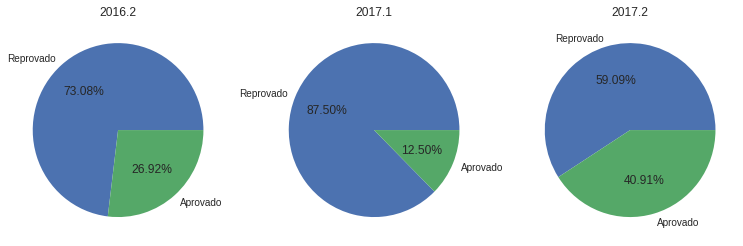

In [18]:
print('Aprovação/Reprovação por semestre')

fig = plt.figure(figsize=(13, 4));

plt.subplot(1, 3, 1);
plt.title('2016.2');
prob_2016_02.aprovado.value_counts().plot(kind='pie', labels=['Reprovado', 'Aprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.subplot(1, 3, 2);
plt.title('2017.1');
prob_2017_01.aprovado.value_counts().plot(kind='pie', labels=['Reprovado', 'Aprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.subplot(1, 3, 3);
plt.title('2017.2');
prob_2017_02.aprovado.value_counts().plot(kind='pie', labels=['Reprovado', 'Aprovado'], autopct='%.2f%%');
plt.ylabel('');

plt.show();


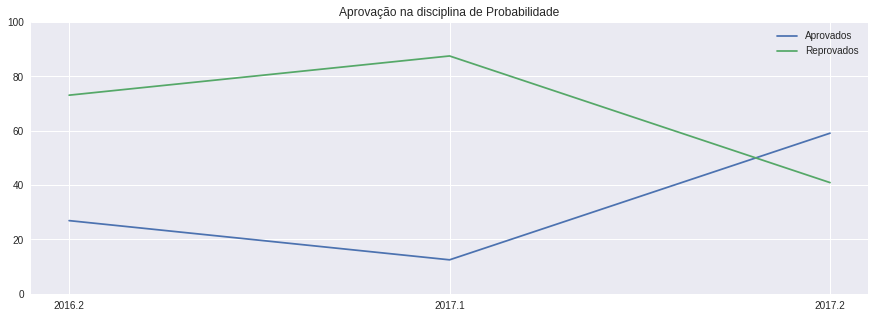

In [97]:
semestres = ['2016.2', '2017.1', '2017.2'];

APROVADO = [aprovados_prob_2016_02.aprovado.PROBABILIDADE, aprovados_prob_2017_01.aprovado.PROBABILIDADE, aprovados_prob_2017_02.aprovado.PROBABILIDADE];
REPROVADO = [100 - APROVADO[0], 100 - APROVADO[1], 100 - APROVADO[2]];

df = pd.DataFrame({'Aprovados': APROVADO, 'Reprovados': REPROVADO}, index=semestres);
df.plot.line(figsize=(15, 5));
plt.xticks(range((len(semestres))), semestres, rotation='horizontal');
plt.ylim(0, 100);
plt.legend();
plt.title('Aprovação na disciplina de Probabilidade')
plt.show();

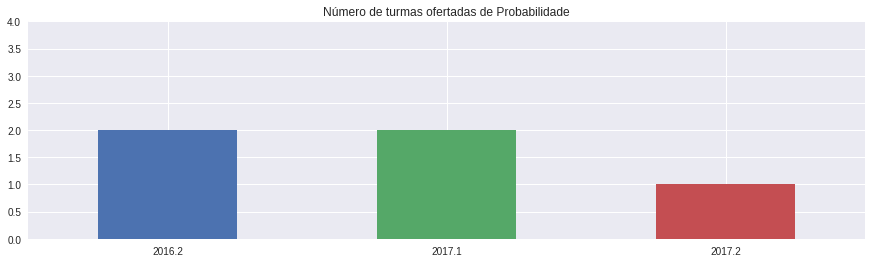

In [96]:
TURMAS_NUM = pd.Series([len(aprovados_prob_2016_02_horario), len(aprovados_prob_2017_01_horario), len(aprovados_prob_2017_02_horario)]);
TURMAS_NUM.plot(kind='bar', figsize=(15, 4));
plt.ylim(0,4);
plt.title('Número de turmas ofertadas de Probabilidade')
plt.xticks(range((len(semestres))), semestres, rotation='horizontal');

Aprovação por turma


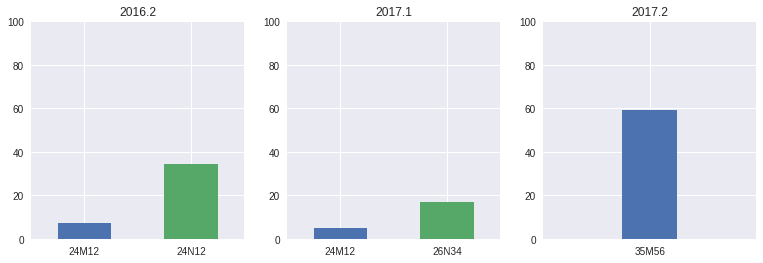

In [21]:
print('Aprovação por turma');

fig = plt.figure(figsize=(13, 4));

plt.subplot(1, 3, 1);
plt.title('2016.2');
aprovados_prob_2016_02_horario.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range(len(aprovados_prob_2016_02_horario.index.values)), reduce_names(aprovados_prob_2016_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.subplot(1, 3, 2);
plt.title('2017.1');
aprovados_prob_2017_01_horario.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range(len(aprovados_prob_2017_01_horario.index.values)), reduce_names(aprovados_prob_2017_01_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.subplot(1, 3, 3);
plt.title('2017.2');
aprovados_prob_2017_02_horario.aprovado.plot(kind='bar', width=0.175);
plt.xticks(range(len(aprovados_prob_2017_02_horario.index.values)), reduce_names(aprovados_prob_2017_02_horario.index.values, 1), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.show();

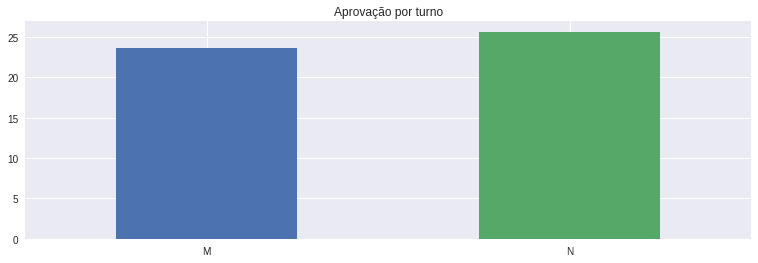

In [86]:
labels = ['M', 'T', 'N'];

fig = plt.figure(figsize=(13, 4));

plt.subplot(1, 1, 1);
plt.title('Aprovação por turno');
plt.xticks(range((len(turnos))), turnos, rotation='horizontal');

TURNOS = [[0,0],[0,0],[0,0]];
  
def update_turns(df, TURNOS):
  
  turmas = reduce_names(df.index.values, 1);
  
  for i in range(len(df)):
    
    if 'M' in turmas[i]:
      
      TURNOS[0][0] += df.iloc[i].aprovado;
      TURNOS[0][1] += 1;
   
    elif 'T' in turmas[i]:
      
      TURNOS[1][0] += df.iloc[i].aprovado;
      TURNOS[1][1] += 1;
      
    elif 'N' in turmas[i]:
      
      TURNOS[2][0] += df.iloc[i].aprovado;
      TURNOS[2][1] += 1;

  return TURNOS;

def safe_div(x,y):
  
    if y == 0:
      
        return 0;
      
    return x / y;

TURNOS = update_turns(aprovados_prob_2016_02_horario, TURNOS);
TURNOS = update_turns(aprovados_prob_2017_01_horario, TURNOS);
TURNOS = update_turns(aprovados_prob_2017_02_horario, TURNOS);

APR = pd.Series([safe_div(TURNOS[0][0],TURNOS[0][1]), safe_div(TURNOS[1][0],TURNOS[1][1]), safe_div(TURNOS[2][0],TURNOS[2][1])]);

for i in range(len(APR)):
   
    if APR[i] == 0:
      
      APR = APR.drop(labels=i);
      labels.pop(i);

APR.plot(kind='bar');
plt.xticks(range(len(labels)), labels, rotation='horizontal');

plt.show();

Aprovação por professor


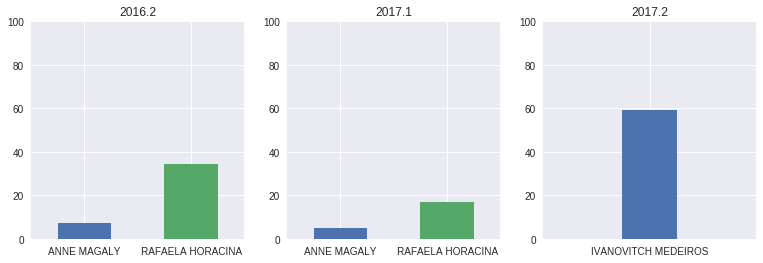

In [94]:
print('Aprovação por professor');

fig = plt.figure(figsize=(13, 4));

plt.subplot(1, 3, 1);
plt.title('2016.2');
aprovados_prob_2016_02_professor.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range((len(aprovados_prob_2016_02_professor))), reduce_names(aprovados_prob_2016_02_professor.index.values, 2), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.subplot(1, 3, 2);
plt.title('2017.1');
aprovados_prob_2017_01_professor.aprovado.plot(kind='bar', width=0.5);
plt.xticks(range((len(aprovados_prob_2017_01_professor))),  reduce_names(aprovados_prob_2017_01_professor.index.values, 2), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.subplot(1, 3, 3);
plt.title('2017.2');
aprovados_prob_2017_02_professor.aprovado.plot(kind='bar', width=0.175);
plt.xticks(range((len(aprovados_prob_2017_02_professor))),  reduce_names(aprovados_prob_2017_02_professor.index.values, 2), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);

plt.show();

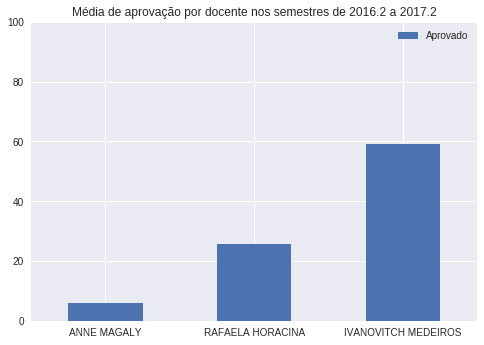

In [98]:
#Média de aprovação por docente no período de 2016.2 à 2017.2

percent_professor = ((aprovados_prob_2016_02_professor+aprovados_prob_2017_01_professor)/2).append(aprovados_prob_2017_02_professor)
#print(percent_professor)
percent_professor.plot(kind='bar');
plt.xticks(range((len(percent_professor))),  reduce_names(percent_professor.index.values, 2), rotation='horizontal');
plt.xlabel('');
plt.ylim(0, 100);
plt.title('Média de aprovação por docente nos semestres de 2016.2 a 2017.2');
plt.legend(['Aprovado']);
plt.show()